In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from pylab import rcParams

In [2]:
#Reading the files
train=pd.read_csv('Study/Mid Project -1/Dataset/train.csv')
test=pd.read_csv('Study/Mid Project -1/Dataset/test.csv')
train_label=pd.read_csv('Study/Mid Project -1/Dataset/train_label.csv',header=None)
test_label=pd.read_csv('Study/Mid Project -1/Dataset/test_label.csv',header=None)

In [3]:
#  combining the indepedent and target variables
train['totalbooking']=train_label
test['totalbooking']=test_label

In [4]:
print(train.shape)
print(test.shape)

(8708, 10)
(2178, 10)


# Feature Engineering

In [5]:
# datetime seperation into date and hour columns
train['date']=train.datetime.apply(lambda x:x.split()[0])
train['hour']=train.datetime.apply(lambda x:x.split()[1].split(':')[0])
test['date']=test.datetime.apply(lambda x:x.split()[0])
test['hour']=test.datetime.apply(lambda x:x.split()[1].split(':')[0])
train.sample(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbooking,date,hour
5849,11/14/2011 19:00,Winter,0,1,Clear + Few clouds,24.60,31.060,53,19.9995,302,11/14/2011,19
4137,2/16/2011 18:00,Spring,0,1,Clear + Few clouds,16.40,20.455,40,15.0013,222,2/16/2011,18
4082,3/13/2012 5:00,Spring,0,1,Mist + Cloudy,18.86,22.725,82,12.9980,24,3/13/2012,5


In [6]:
# date column from object to datetime series
train['date']=pd.to_datetime(train['date'])
test['date']=pd.to_datetime(test['date'])
train.sample(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbooking,date,hour
3379,4/2/2011 23:00,Summer,0,0,Clear + Few clouds,13.12,15.910,61,11.0014,53,2011-04-02,23
7602,9/14/2011 0:00,Fall,0,1,Clear + Few clouds,25.42,29.545,78,6.0032,33,2011-09-14,0
4772,12/7/2011 23:00,Winter,0,1,Clear + Few clouds,9.84,10.605,93,26.0027,16,2011-12-07,23


In [7]:
# seperating month,weekday amd year from the date column
train['month'] = train['date'].dt.month
train['weekday'] = train['date'].dt.weekday
test['month'] = test['date'].dt.month
test['weekday'] = test['date'].dt.weekday
train['year'] = train['date'].dt.year
test['year'] = test['date'].dt.year
train.sample(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbooking,date,hour,month,weekday,year
8568,6/2/2011 7:00,Summer,0,1,Clear + Few clouds,28.70,31.82,34,16.9979,304,2011-06-02,7,6,3,2011
6881,10/8/2011 15:00,Winter,0,0,Clear + Few clouds,27.06,31.06,39,0.0000,496,2011-10-08,15,10,5,2011
560,5/6/2011 23:00,Summer,0,1,Clear + Few clouds,18.04,21.97,82,8.9981,120,2011-05-06,23,5,4,2011


In [8]:
#changing the hour data type
train['hour']=train['hour'].astype(int)
test['hour']=test['hour'].astype(int)
train.sample(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbooking,date,hour,month,weekday,year
4256,10/19/2012 21:00,Winter,0,1,Clear + Few clouds,20.5,24.240,77,0.0000,206,2012-10-19,21,10,4,2012
727,8/15/2012 8:00,Fall,0,1,Mist + Cloudy,28.7,32.575,65,19.0012,682,2012-08-15,8,8,2,2012
780,8/8/2011 0:00,Fall,0,1,Clear + Few clouds,28.7,33.335,79,7.0015,30,2011-08-08,0,8,0,2011


In [9]:
# drop datatime column
train=train.drop('datetime',axis=1)
test=test.drop('datetime',axis=1)
train.sample(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbooking,date,hour,month,weekday,year
1893,Spring,0,1,"Light Snow, Light Rain",12.30,14.395,93,16.9979,8,2011-03-16,0,3,2,2011
2466,Summer,0,1,Mist + Cloudy,23.78,27.275,81,8.9981,184,2012-05-02,11,5,2,2012
3856,Fall,0,1,Clear + Few clouds,28.70,33.335,79,0.0000,473,2012-08-02,7,8,3,2012


In [10]:
#seperation of weather into two columns
train[['weather1','weather2']] = train["weather"].str.split('[+|,]',n =1, expand = True)
test[['weather1','weather2']] = test["weather"].str.split('[+|,]',n =1, expand = True)
train.sample(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,totalbooking,date,hour,month,weekday,year,weather1,weather2
7706,Summer,1,0,Clear + Few clouds,32.80,34.850,33,31.0009,358,2012-04-16,16,4,0,2012,Clear,Few clouds
5106,Fall,0,1,Clear + Few clouds,37.72,40.910,29,12.9980,285,2012-07-06,15,7,4,2012,Clear,Few clouds
1255,Fall,0,1,Clear + Few clouds,27.06,29.545,89,0.0000,203,2011-09-09,21,9,4,2011,Clear,Few clouds


In [11]:
# drop the weather column
train=train.drop('weather',axis=1)
test=test.drop('weather',axis=1)
train.sample(3)

,season,holiday,workingday,temp,atemp,humidity,windspeed,totalbooking,date,hour,month,weekday,year,weather1,weather2
4413,Summer,0,1,27.88,31.820,89,15.0013,4,2011-06-01,4,6,2,2011,Mist,Cloudy
791,Fall,0,1,35.26,39.395,41,16.9979,166,2011-07-07,15,7,3,2011,Clear,Few clouds
2474,Winter,0,1,9.02,10.605,55,19.9995,9,2012-12-06,4,12,3,2012,Clear,Few clouds


In [12]:
#removing the holiday and workingday that are same  
train = train.loc[(train['holiday'] == 0) & (train['workingday'] != 0)] 
test = test.loc[(test['holiday'] == 0) & (test['workingday'] != 0)] 
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train.sample(3)

,season,holiday,workingday,temp,atemp,humidity,windspeed,totalbooking,date,hour,month,weekday,year,weather1,weather2
4857,Winter,0,1,21.32,25.00,83,19.0012,23,2012-11-13,0,11,1,2012,Mist,Cloudy
3923,Summer,0,1,25.42,28.79,83,12.9980,8,2012-06-13,3,6,2,2012,Clear,Few clouds
1990,Fall,0,1,24.60,28.03,83,6.0032,4,2011-09-02,4,9,4,2011,Clear,Few clouds


In [13]:
# some data of windspeed has no values filling those values with mean
#train['windspeed']=train['windspeed'].replace(to_replace=0.0000,value=train['windspeed'].mean())
#test['windspeed']=test['windspeed'].replace(to_replace=0.0000,value=test['windspeed'].mean())
#train.sample(3)

In [14]:
# date column is not need because we are have those info in other columns
train=train.drop('date',axis=1)
test=test.drop('date',axis=1)
train.sample(3)

,season,holiday,workingday,temp,atemp,humidity,windspeed,totalbooking,hour,month,weekday,year,weather1,weather2
2880,Summer,0,1,21.32,25.000,27,19.0012,358,13,4,4,2012,Clear,Few clouds
207,Spring,0,1,5.74,6.060,50,22.0028,87,7,2,3,2011,Clear,Few clouds
5015,Summer,0,1,25.42,30.305,69,11.0014,642,18,6,0,2012,Mist,Cloudy


In [15]:
# the temp and actual temp as high correlation we can remove any one of them
print(train['temp'].corr(train['atemp']))
train=train.drop('temp',axis=1)
test=test.drop('temp',axis=1)
train.sample(3)

0.9797856252890171


,season,holiday,workingday,atemp,humidity,windspeed,totalbooking,hour,month,weekday,year,weather1,weather2
2013,Spring,0,1,19.695,46,7.0015,281,19,1,1,2012,Clear,Few clouds
1279,Winter,0,1,27.275,64,0.0000,785,8,10,4,2012,Clear,Few clouds
1399,Fall,0,1,31.820,65,0.0000,8,2,8,2,2012,Clear,Few clouds


In [16]:
print(train.shape)
print(test.shape)

(5924, 13)
(1488, 13)


# Outlier analysis

In [17]:
train.describe()

,holiday,workingday,atemp,humidity,windspeed,totalbooking,hour,month,weekday,year
count,5924.0,5924.0,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000
mean,0.0,1.0,23.808046,61.527009,12.917074,194.535955,11.589298,6.525321,2.043552,2011.502870
std,0.0,0.0,8.436218,19.248119,8.174576,184.835890,6.867819,3.412820,1.390664,0.500034
min,0.0,1.0,0.760000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2011.000000
25%,0.0,1.0,16.665000,47.000000,7.001500,43.000000,6.000000,4.000000,1.000000,2011.000000
50%,0.0,1.0,24.240000,61.000000,12.998000,153.000000,12.000000,6.000000,2.000000,2012.000000
75%,0.0,1.0,31.060000,77.000000,19.001200,280.000000,17.000000,9.000000,3.000000,2012.000000
max,0.0,1.0,43.940000,100.000000,51.998700,977.000000,23.000000,12.000000,4.000000,2012.000000


In [18]:
rcParams['figure.figsize'] = 16,8 # fixing the size for all plots

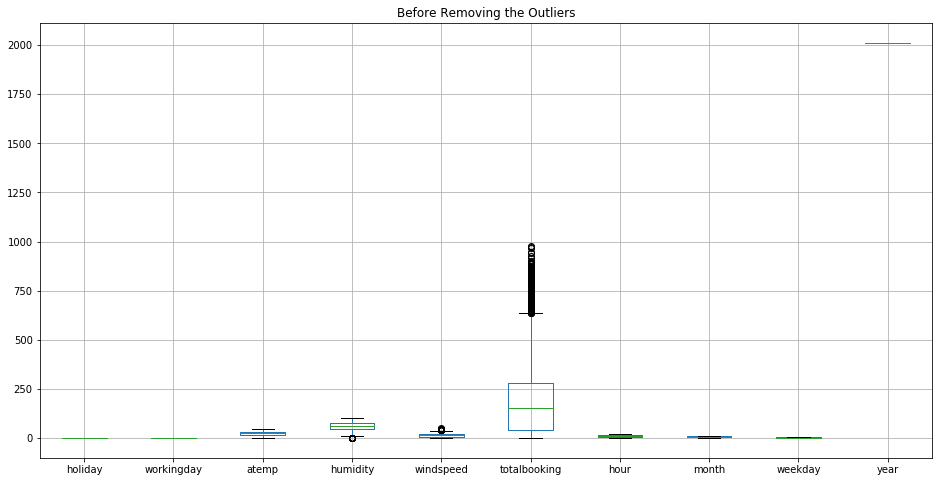

In [19]:
train.boxplot()
plt.title('Before Removing the Outliers')
plt.show()

In [20]:
Q1 = train.quantile(0.15)
Q3 = train.quantile(0.85)
IQR = Q3 - Q1
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
Q1t = test.quantile(0.15)
Q3t = test.quantile(0.85)
IQRt = Q3t - Q1t
test = test[~((test < (Q1t - 1.5 * IQRt)) |(test > (Q3t + 1.5 * IQRt))).any(axis=1)]

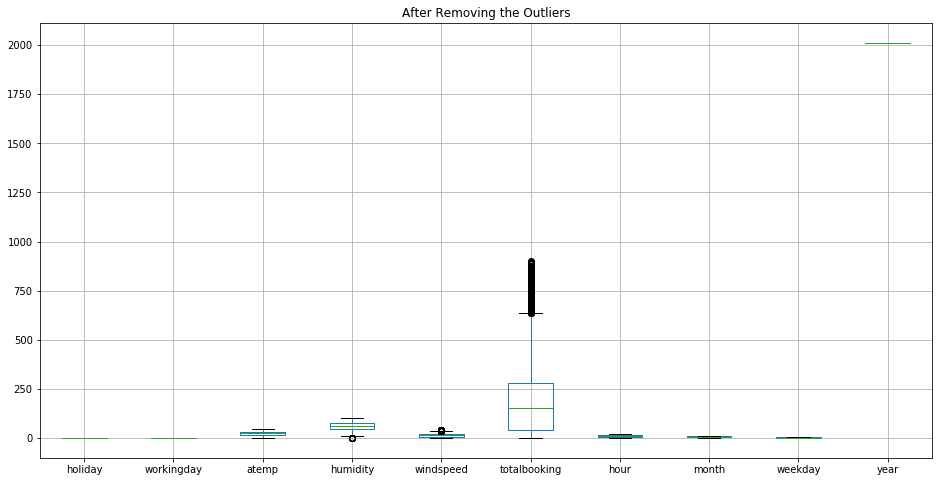

In [21]:
train.boxplot()
plt.title('After Removing the Outliers')
plt.show()

In [22]:
print(train.shape)
print(test.shape)

(5902, 13)
(1477, 13)


# Correlation Analysis

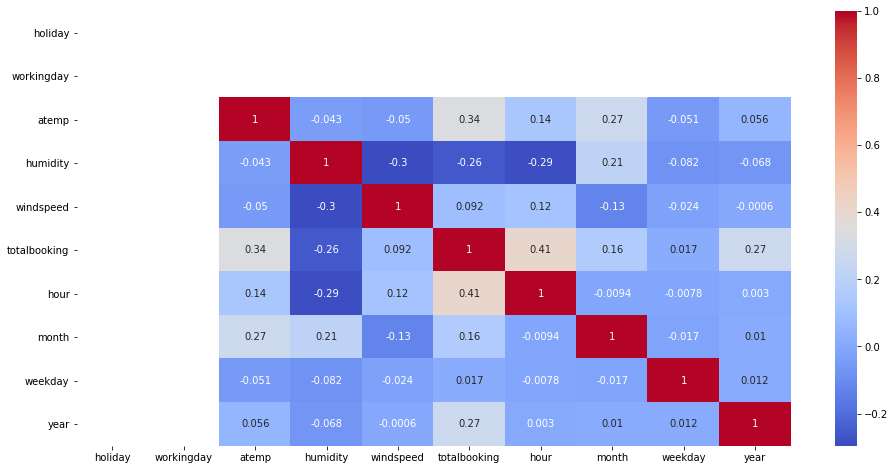

In [23]:
corrmat = train.corr()
top_corr_features = corrmat.index
sns.heatmap(train[top_corr_features].corr(),annot=True,cmap='coolwarm')

In [24]:
# as there is no correlation in holiday and weekday 
# date column is not need because we are have those info in other columns
train=train.drop(['holiday','workingday'],axis=1)
test=test.drop(['holiday','workingday'],axis=1)
train.sample(3)

,season,atemp,humidity,windspeed,totalbooking,hour,month,weekday,year,weather1,weather2
3826,Winter,25.76,70,32.9975,210,8,10,2,2011,Light Snow,Light Rain
2611,Fall,37.12,30,0.0000,627,18,7,1,2012,Mist,Cloudy
996,Fall,37.88,34,12.9980,556,18,8,1,2011,Mist,Cloudy


# Visualizing the data

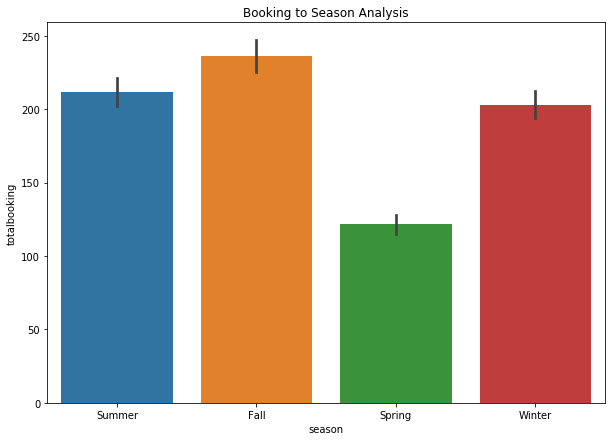

In [25]:
plt.figure(figsize=(10,7))
sns.barplot(x='season',y='totalbooking',data=train)
plt.title('Booking to Season Analysis')
plt.show()

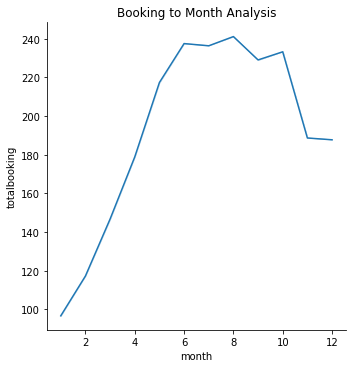

In [26]:
sns.relplot(x='month',y='totalbooking',data=train,kind='line',ci=False)
plt.title('Booking to Month Analysis')
plt.show()

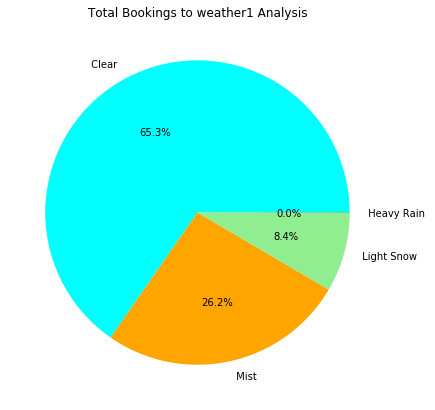

In [27]:
labels=train.weather1.unique().tolist()
colors=['cyan','orange','lightgreen','black']
values=train['weather1'].value_counts().values
#visualization
plt.figure(figsize=(7,7))
plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Total Bookings to weather1 Analysis')
plt.show()

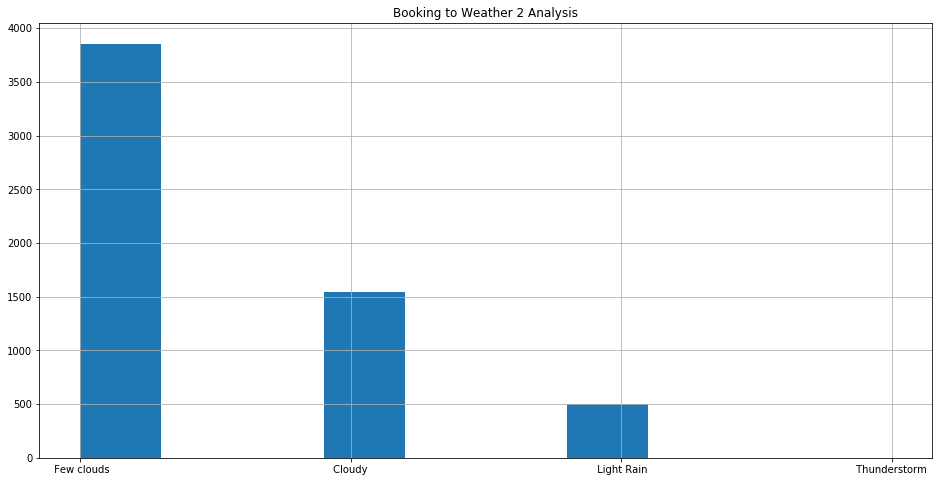

In [28]:
train['weather2'].hist()
plt.title('Booking to Weather 2 Analysis')
plt.show()

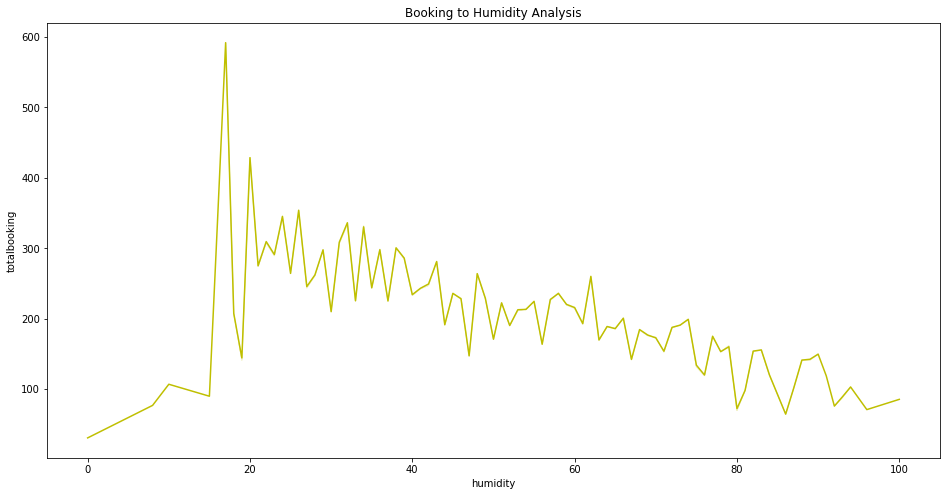

In [29]:
sns.lineplot(x = 'humidity', y  = 'totalbooking', data = train,ci=False,color='y')
plt.title('Booking to Humidity Analysis')
plt.show()

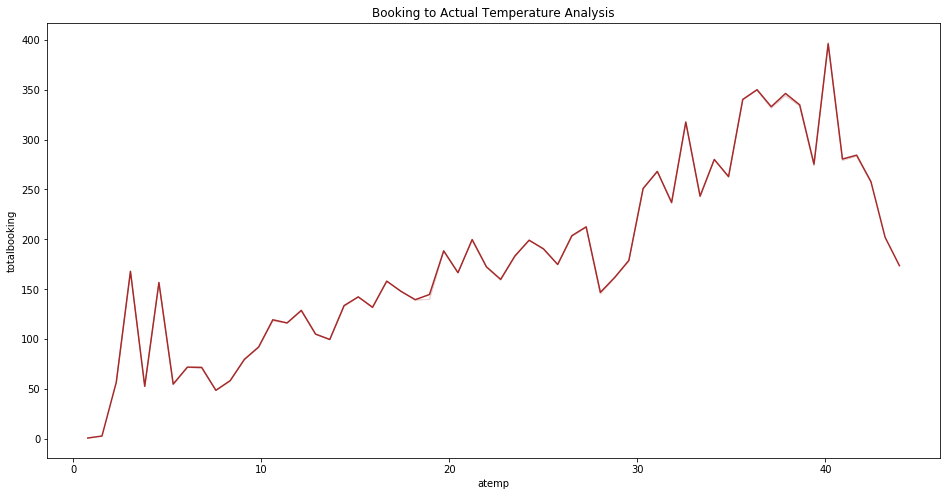

In [30]:
sns.lineplot(x = 'atemp', y = 'totalbooking',data = train,ci=False,color='brown')
plt.title('Booking to Actual Temperature Analysis')
plt.show()

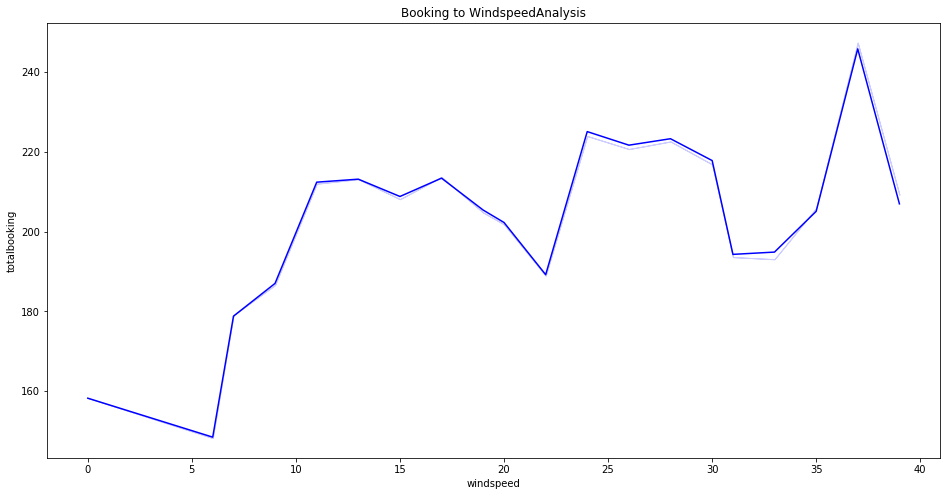

In [31]:
sns.lineplot(x = 'windspeed', y  = 'totalbooking', data = train,ci=False,color='blue')
plt.title('Booking to WindspeedAnalysis')
plt.show()

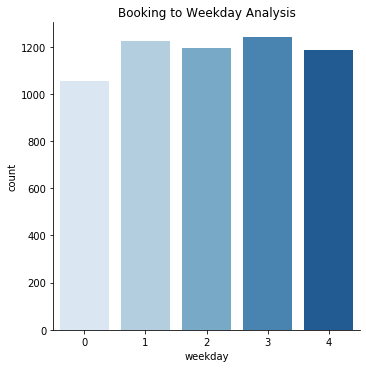

In [32]:
sns.catplot(x='weekday', kind='count', palette='Blues', data=train)
plt.title('Booking to Weekday Analysis')
plt.show()

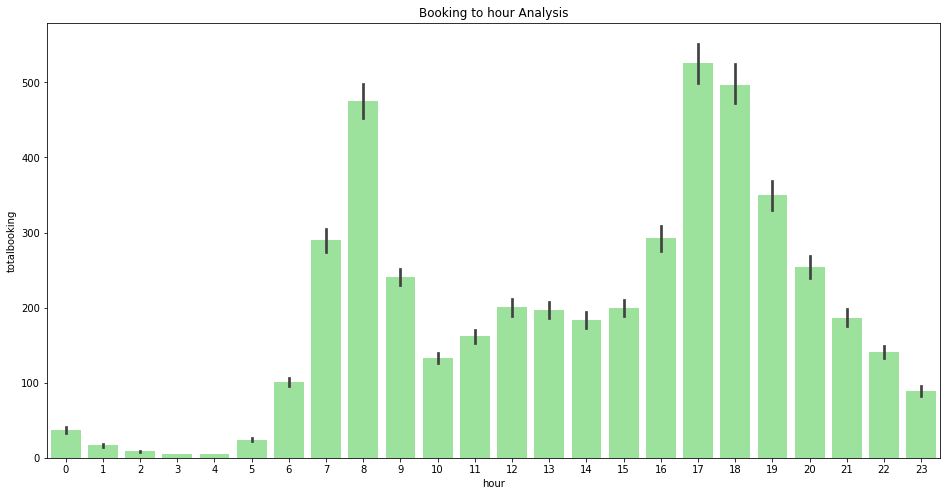

In [33]:
sns.barplot(x="hour",y='totalbooking', data=train, color="lightgreen")
plt.title('Booking to hour Analysis')
plt.show()

# Encoding the Categorical Variables

In [34]:
label=LabelEncoder()
train[['season','weather1','weather2']]=train[['season','weather1','weather2']].apply(label.fit_transform)
test[['season','weather1','weather2']]=test[['season','weather1','weather2']].apply(label.fit_transform)
train.sample(3)

,season,atemp,humidity,windspeed,totalbooking,hour,month,weekday,year,weather1,weather2
5295,1,12.880,60,11.0014,71,22,1,3,2012,0,1
1716,0,36.365,46,19.9995,409,17,8,3,2011,2,2
4972,1,9.090,47,12.9980,65,23,1,4,2012,0,1


In [35]:
# splitting the independent and target variable
x=train.drop('totalbooking',axis=1)
Y=train['totalbooking'].values
x_test=test.drop('totalbooking',axis=1)
Y_test=test['totalbooking'].values

# Regression Analysis

In [36]:
# linear Regression
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x,Y)
predl=linear_model.predict(x_test)
print('R2_SCORE OF LINEAR REGRESSION    :',np.round(r2_score(Y_test,predl),2))

R2_SCORE OF LINEAR REGRESSION    : 0.35


In [37]:
# Decision Tree regression
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(x,Y)
pred_tree=tree.predict(x_test)
print('R2_SCORE OF DECISION TREE REGRESSOR    :',np.round(r2_score(Y_test,pred_tree),2))

R2_SCORE OF DECISION TREE REGRESSOR    : 0.91


# Ensemble model

In [38]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_jobs=-1)
parameters = {'n_estimators':np.arange(80,140,10),'max_depth':np.arange(3,8,1)}
xgb = GridSearchCV(xgb,parameters)
xgb.fit(x,Y)
predx=xgb.predict(x_test)

In [39]:
# best fitted hyperparameters of the random forest
xgb.best_params_

{'max_depth': 5, 'n_estimators': 130}

In [40]:
xgb.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=130, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [41]:
r2=r2_score(Y_test,predx)
mse=mean_squared_error(Y_test,predx)

In [42]:
print('R2_SCORE  :',np.round(r2,2) )
print('MSE       :',np.round(mse,2) )

R2_SCORE  : 0.96
MSE       : 1186.08
